<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/Schi_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import The Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/dataset/data/train"
valid_path="/content/drive/MyDrive/dataset/data/validation"

In [ ]:
xcep = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMAGE_SIZE + [3],
    pooling='max',
    classes=2,
    classifier_activation="softmax",
)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
xcep.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
# This will let us use the default weights used by the imagenet.  
for layer in xcep.layers:
    layer.trainable = False

# Set the flatten layer.
x = Flatten() (xcep.output)
prediction = Dense(2, activation = 'softmax')(x)

# Create a model Object
model = Model(inputs = xcep.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
# Use the Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

test_set = train_datagen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary'
)

Found 282 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Fit the model.
hist = model.fit(training_set, validation_data = test_set, steps_per_epoch = 10, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 98s 9s/step - loss: 0.6819 - accuracy: 0.6299 - val_loss: 0.8586 - val_accuracy: 0.5474
Epoch 2/5
10/10 [==============================] - 51s 5s/step - loss: 0.2820 - accuracy: 0.9156 - val_loss: 0.5884 - val_accuracy: 0.7053
Epoch 3/5
10/10 [==============================] - 48s 5s/step - loss: 0.1306 - accuracy: 0.9805 - val_loss: 0.4896 - val_accuracy: 0.7368
Epoch 4/5
10/10 [==============================] - 52s 5s/step - loss: 0.0905 - accuracy: 0.9875 - val_loss: 0.4575 - val_accuracy: 0.7684
Epoch 5/5
10/10 [==============================] - 50s 5s/step - loss: 0.0656 - accuracy: 0.9935 - val_loss: 0.4018 - val_accuracy: 0.7789


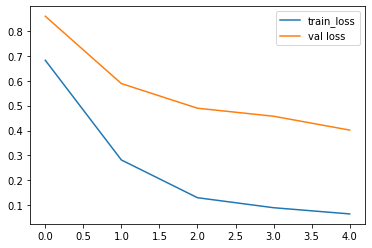

In [ ]:
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

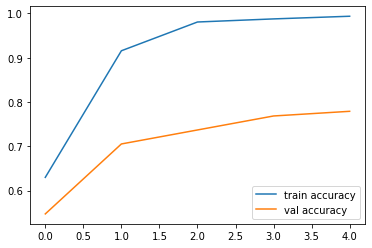

In [ ]:
# Plot the Accuracy
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')